#### Imports

In [6]:
import requests
import json
import pandas as pd
from datetime import datetime

#### Settings

In [20]:
%matplotlib inline

### 1. Getting Bitcoin Price Data

In [32]:
#get data
response = requests.get('https://api.coindesk.com/v1/bpi/historical/close.json?start=2011-05-01&end=2017-11-18')
response_as_json = json.loads(response.content)

#transform data
bpi = pd.DataFrame.from_dict(response_as_json)
bpi.drop(['disclaimer', 'time'], axis=1, inplace=True)
bpi.drop(['updated', 'updatedISO'], inplace=True)
bpi = bpi.rename(columns={'bpi': 'usd_price'})
bpi.index.names = ['date']
bpi.index = pd.to_datetime(bpi.index, format="%Y-%m-%d")

#output data
bpi.head()

,usd_price
date,
2011-05-01,3.0331
2011-05-02,3.2000
2011-05-03,3.4100
2011-05-04,3.4061
2011-05-05,3.3330


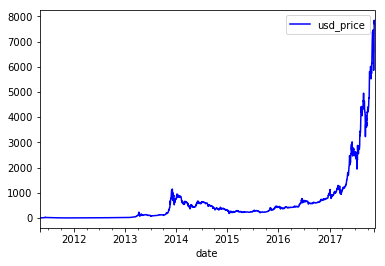

In [37]:
bpi.plot(color='b')

### 2. Getting Google Trends Data

In [34]:
#get data
google = pd.read_csv("data/google_trends.csv", ";")

#transform data
google['date'] = pd.to_datetime(google['date'], format="%d.%m.%y")
google['search_volume'] = google['search_volume'].str.replace(',','.')
google['search_volume'] = google['search_volume'].apply(pd.to_numeric)
google.set_index('date', inplace=True)

#output data
google.head()

,search_volume
date,
2011-05-01,0.704634
2011-05-02,0.493244
2011-05-03,0.493244
2011-05-04,0.422781
2011-05-05,0.493244


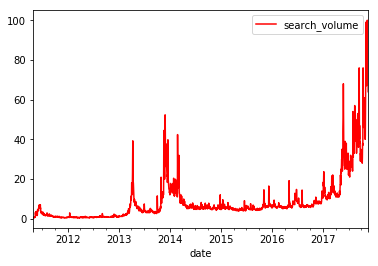

In [39]:
google.plot(color='r')

### 3. Merging data